In [2]:
import os

directory = "/Users/dakshp/TargetCreator/generated"
fileNames = []
for filename in os.listdir(directory):
    if filename.endswith(".jpg"): 
        fileNames.append(filename)
        # print(os.path.join(directory, filename))
        continue
    else:
        continue

In [3]:
print(fileNames[:5])

['102_blue_semicircle_black_O_40.jpg', '102_yellow_semicircle_blue_K_40.jpg', '102_white_circle_gray_R_40.jpg', '102_blue_cross_yellow_8_40.jpg', '102_brown_trapezoid_yellow_J_40.jpg']


In [4]:
import numpy as np
import cv2

In [13]:
ims = np.ndarray([10, 40, 40, 3])
labels = []

In [25]:
for i in range(10):
    print(fileNames[i])
    currIm = cv2.imread("/Users/dakshp/TargetCreator/generated/" + fileNames[i])
    ims[i] = currIm
    labels.append(fileNames[i].split("_")[1:-1])
    
print(ims.shape, len(labels))

102_blue_semicircle_black_O_40.jpg
102_yellow_semicircle_blue_K_40.jpg
102_white_circle_gray_R_40.jpg
102_blue_cross_yellow_8_40.jpg
102_brown_trapezoid_yellow_J_40.jpg
102_brown_hexagon_yellow_6_40.jpg
102_red_star_orange_V_40.jpg
102_red_heptagon_blue_W_40.jpg
102_red_hexagon_black_W_40.jpg
102_purple_octagon_green_8_40.jpg
(10, 40, 40, 3) 20


In [15]:
colors = {'white':  1,
         'black':  2,
         'gray':   3,
         'red':    4,
         'blue':   5, 
         'green':  6, 
         'yellow': 7, 
         'purple': 8,
         'brown':  9,
         'orange': 10}
shapes = {"circle": 1,
         "cross": 2,
         "heptagon": 3,
         "hexagon": 4,
         "octagon": 5,
         "pentagon": 6,
         "quartercircle": 7,
         "rectangle": 8,
         "semicircle": 9,
         "square": 10,
         "star": 11,
         "trapezoid": 12,
         "triangle": 13}
print(labels[0])

['blue', 'semicircle', 'black', 'O']


In [16]:
numericLabels = []
for labelList in labels:
    newLabelList = [colors[labelList[0]], shapes[labelList[1]], colors[labelList[2]], ord(labelList[3]) - 54]
    numericLabels.append(newLabelList)
print(numericLabels[0])

[5, 9, 2, 25]


In [17]:
ndLabels = np.ndarray([len(numericLabels), 4])
for i in range(len(numericLabels)):
    ndLabels[i] = numericLabels[i]

In [18]:
len(ndLabels) == len(ims)

True

In [19]:
x_test = np.ndarray([3, 40, 40, 3])
y_test = np.ndarray([3, 4])

x_train = np.ndarray([7, 40, 40, 3])
y_train = np.ndarray([7, 4])

# generate random integer values
import random

my_list = list(range(0,10))
random.shuffle(my_list)

test_indices = my_list[:3]
train_indices = my_list[3:]

for index in range(len(test_indices)):
    x_test[index] = ims[test_indices[index]]
    y_test[index] = ndLabels[test_indices[index]]
    
for index in range(len(train_indices)):
    x_train[index] = ims[train_indices[index]]
    y_train[index] = ndLabels[train_indices[index]]

In [71]:
# np.save("x_test.npy", x_test)
# np.save("y_test.npy", y_test)
# np.save("x_train.npy", x_train)
# np.save("y_train.npy", y_train)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


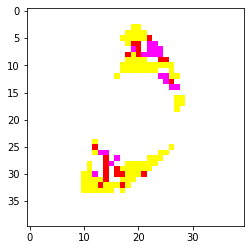

In [26]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(ims[0], interpolation='nearest')
plt.show()